In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
burs = pd.read_csv('abs2011combo.csv')
burs['postcode'] = charity_new['postcode'].astype(str)
charity_plus = pd.merge(charity_new, burs, on='postcode')
charity_plus.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
0,801,2,315.00,0,315.00,72,0,4,1,0,...,54,45,18,30,31,29,0,29,130,366
1,801,2,315.00,0,315.00,72,0,4,1,0,...,0,4,0,4,3,0,3,0,0,14
2,801,6,303.55,0,303.55,65,0,4,1,1,...,54,45,18,30,31,29,0,29,130,366
3,801,6,303.55,0,303.55,65,0,4,1,1,...,0,4,0,4,3,0,3,0,0,14
4,804,4,250.00,0,250.00,80,0,4,1,0,...,6,16,3,4,11,8,0,4,34,86


In [3]:
#have a look at the data
charity_plus.describe(include='all')

,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
count,58380,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380,58380.000000,58380.000000,...,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000
unique,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.643508,99.220021,5.009467,104.229489,63.093251,0.659764,4,0.554454,0.579051,...,7.083916,7.601816,10.497705,4.342891,9.912813,4.153272,5.653015,10.065125,24.786862,84.097413
std,NaN,3.147691,84.478821,23.913798,84.107598,14.249441,0.473793,0,0.497030,0.493716,...,10.330220,12.880232,16.684712,7.099764,15.928607,7.172625,11.008642,16.633231,37.929731,124.591011
min,NaN,1.000000,-201.500000,-100.000000,-201.500000,0.000000,0.000000,4,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,46.600000,0.000000,50.000000,56.000000,0.000000,4,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,9.000000
50%,NaN,1.000000,81.000000,0.000000,85.500000,66.000000,1.000000,4,1.000000,1.000000,...,3.000000,3.000000,4.000000,0.000000,3.000000,0.000000,3.000000,4.000000,10.000000,32.000000
75%,NaN,2.000000,133.000000,0.000000,137.000000,73.000000,1.000000,4,1.000000,1.000000,...,10.000000,10.000000,13.000000,5.000000,13.000000,5.000000,6.000000,12.000000,32.000000,111.000000


In [4]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=5, init='random')
est.fit(charity_plus)
y_kmeans = est.predict(charity_plus)



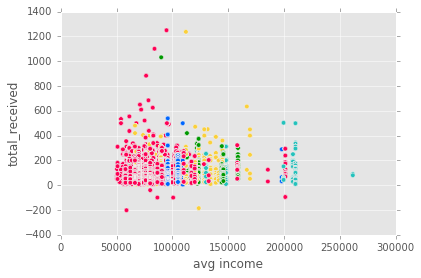

In [5]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#0066ff', '#009900'])
plt.figure()
charity_plus.plot(kind='scatter', x='avg income', y='total_received',c=colors[y_kmeans])

In [ ]:
#is there a better way to visualise the data?? Not sure if this or the other is a better cluster..

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


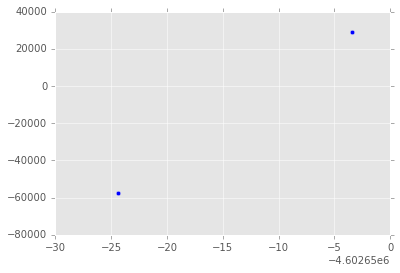

In [6]:

#try some PCA - unsuccessful
from sklearn import decomposition

X = charity_plus.filter(regex="[^total_received|^collection_amount|^donation_amount]")
y = charity_plus.total_received

pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)
target_names = charity_plus.total_received

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y <= i, 0], X_r[y > i, 1], c=c, label=target_name)


In [7]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
decomposition.PCA(copy=True, n_components=3, whiten=False)
print(pca.explained_variance_ratio_) 

[  9.99747890e-01   1.66632393e-04   7.50860470e-05]


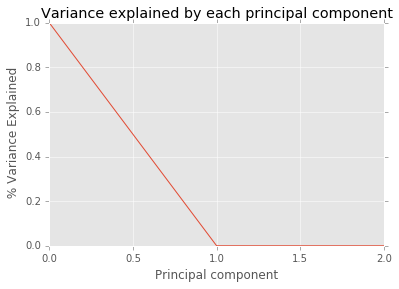

In [8]:
plt.cla()
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')